##### Last edited by Claire Valva on July 31, 2018

## Mean Z histograms and departure from climatological means

##### changes from original: made the means over month rather than day

#### file details: 
will be using file: 1979-2016-300hPa-40.5N-z.nc which is currently located in ~/uncategorized data

This file contains a single 2D array called “z”, whose dimension is (240, 55520). The first dimension is longitude, 1.5 degree interval from 0 to 358.5 (0 is Greenwich Mean). The second dimension is time, 6 hours apart, from 00 UTC January 1, 1979 to 18 UTC December 31, 2016. The unit is meters^2/sec^2. Divide by g = 9.81 m/s^2 to obtain geopotential height, the altitude at which you find 300 hPa.

In [1]:
#import packages
import numpy as np
from netCDF4 import Dataset, num2date # This is to read .nc files and time array
from scipy.signal import get_window, csd
from scipy.fftpack import fft, ifft, fftshift, fftfreq
import matplotlib.pyplot as plt
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import pandas as pd
import datetime
from math import pi
import csv
from IPython.display import display, Markdown, Latex

In [2]:
#import file
filepath = '/home/clairev/uncategorized-data/1979-2016-300hPa-40.5N-z.nc' # Location of the file
fileobj = Dataset(filepath, mode='r')

# Check what's in there
fileobj

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): longitude(240), time(55520)
    variables(dimensions): float32 z(time,longitude)
    groups: 

In [3]:
number_days = fileobj.dimensions['time'].size / 4
number_lon = fileobj.dimensions['longitude'].size
year_number = 2016 - 1979

In [21]:
#load coordinates
#so height[i] is the geopotential height at a given time
height = fileobj.variables['z'][:]
g = 1/9.81
height = height*g

#create time array
time_list = []
for i in range(0,55520):
    time_list.append(i*6)
tunit = "hours since 1979-01-01T00:00:00Z"
tarray = num2date(time_list,units = tunit,calendar = 'gregorian')

#create longitude array
lon_increment = 1.5 # The increment of each longitude grid is 1.5
lon_list = [i * lon_increment for i in range(240)]

# Find mean geopotential heights and differences

In [6]:
#first get the average of each individual day
day_avg = []
number_days = int(len(tarray)/4)

for i in range(number_days):
    for k in range(number_lon):
        #get the day
        day = datetime.datetime.date(tarray[4*i])
        
        #get the longitdue
        lon = lon_list[k]
        
        #get the geopotential heights for the day
        zs = []
        for j in range(4):
            z_temp = height[i + j][k]
            zs.append(z_temp)
        
        #mean the geopotential height
        zmean = np.average(zs)
        
        toappend = {'date' : day, 'lon': lon,
                    'avgz' : zmean}
        
        day_avg.append(toappend)

In [7]:
#make it all a dataframe and then find the difference for each
day_df = pd.DataFrame(day_avg)

day_df['month'] = day_df['date'].apply(lambda x: x.month)
day_df['day'] = day_df['date'].apply(lambda x: x.day)
day_df['year'] = day_df['date'].apply(lambda x: x.year)


day_df['meanval'] = day_df.groupby(by=['month', 'year','lon'])['avgz'].transform('mean')
day_df['difference'] = day_df['avgz'] - day_df['meanval']

In [8]:
#make geopotential height
day_df['meanval'] = day_df['meanval'] / 9.81
day_df['difference'] = day_df['difference'] /9.81

In [36]:
#to compare - get the average of four day sections
avg4_df = day_df.sort_values(by = ['lon','date'])
avg4_df = avg4_df.groupby(np.arange(len(avg4_df))//4).mean()

# Geopotential height histograms

these are the histograms that show geopotential height for each season (over every year) and for each section individually

In [10]:
#set lists of seasons
winter_str = 'month < 3 | month == 12'
spring_str = 'month >= 3 & month <= 5'
summer_str = 'month >= 6 & month <= 8'
fall_str = 'month >= 9 & month <= 11'

season_list = [winter_str, spring_str, summer_str, fall_str]

#set lists of longitude sections
lon_1 = 'lon >= 50 & lon <= 140'
lon_2 = 'lon <= 50 | lon >= 320'
lon_3 = 'lon >= 230 & lon <= 320'
lon_4 = 'lon >= 140 & lon <= 230'

lon_sections = [lon_1, lon_2, lon_3, lon_4]

season_label = ["winter","spring","summer","fall"]

## season: winter

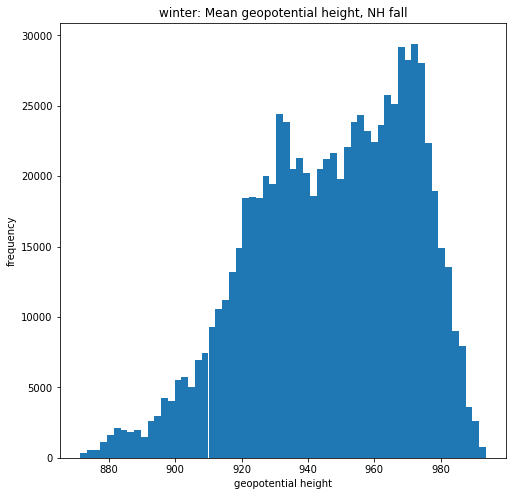

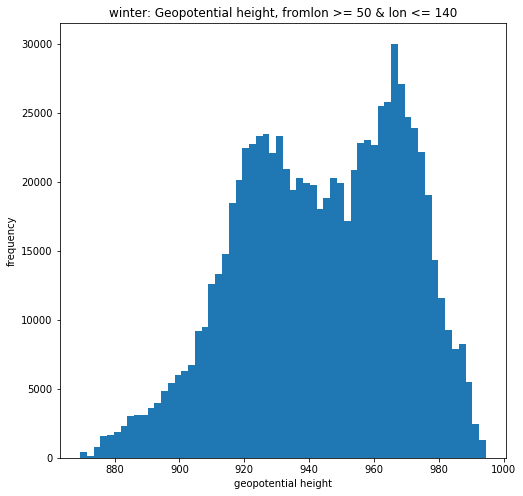

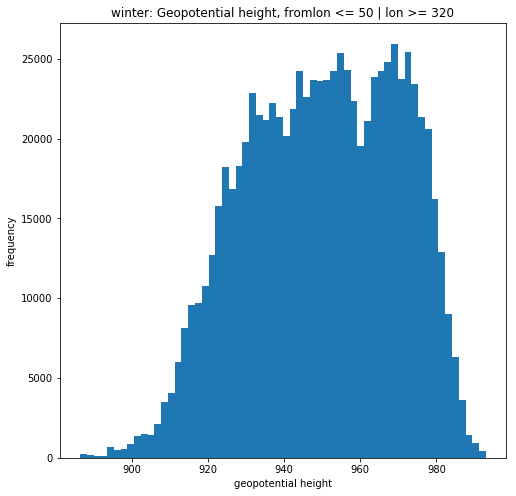

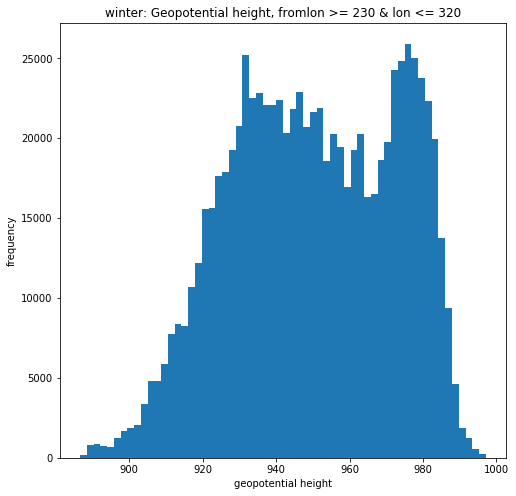

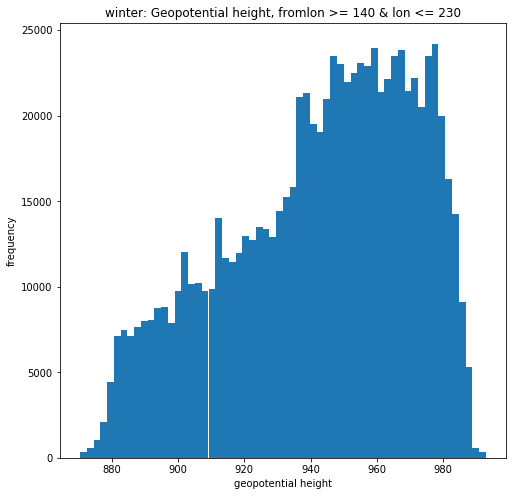

## season: spring

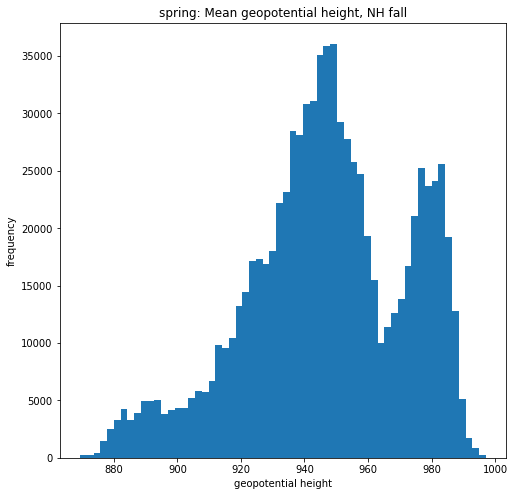

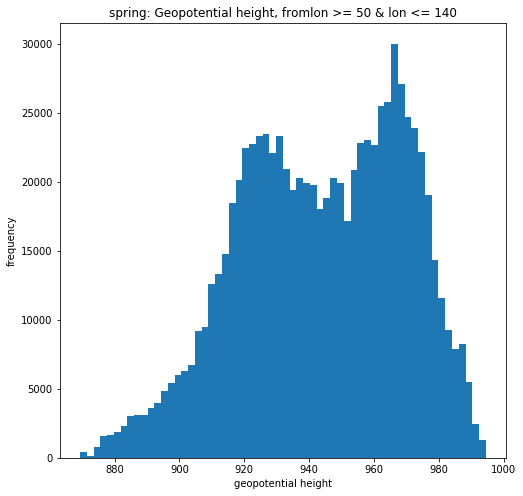

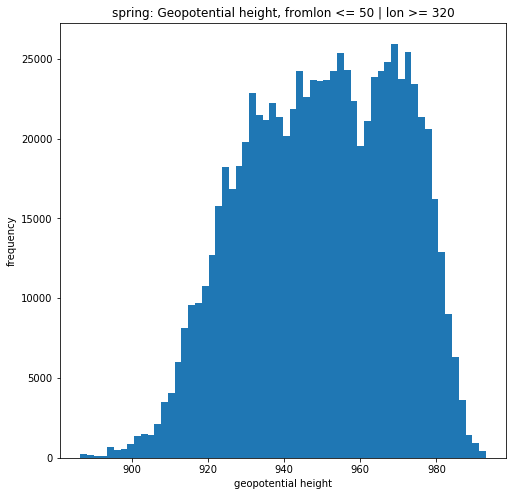

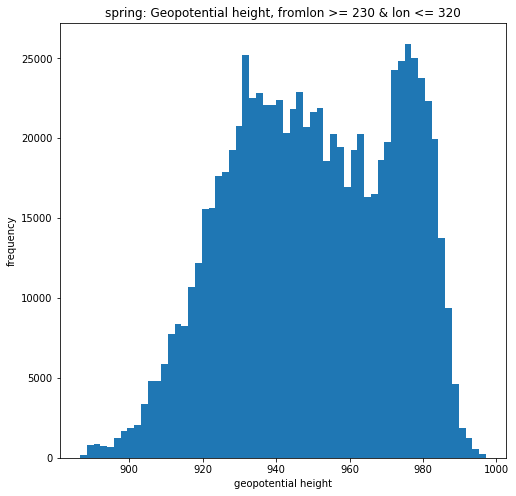

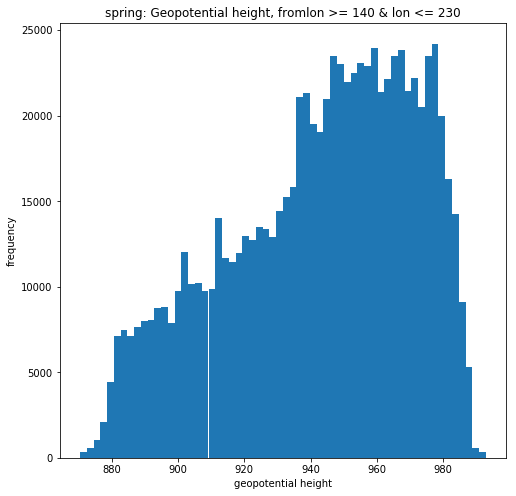

## season: summer

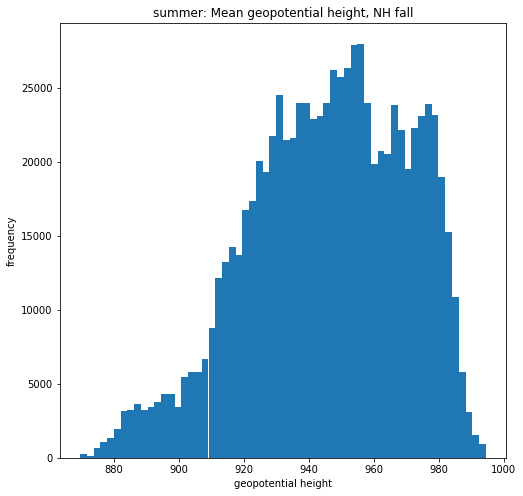

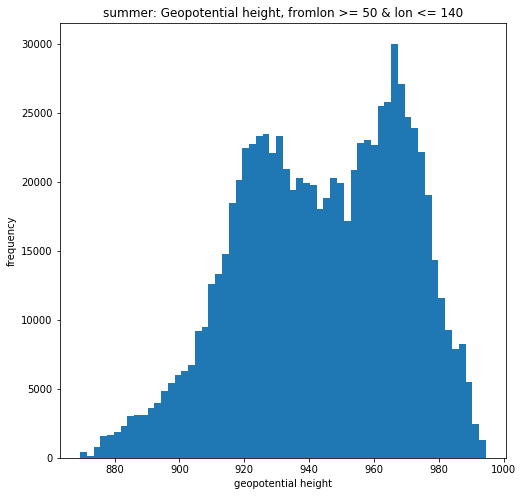

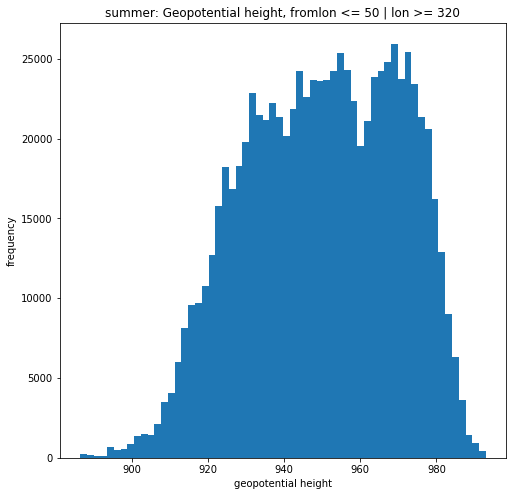

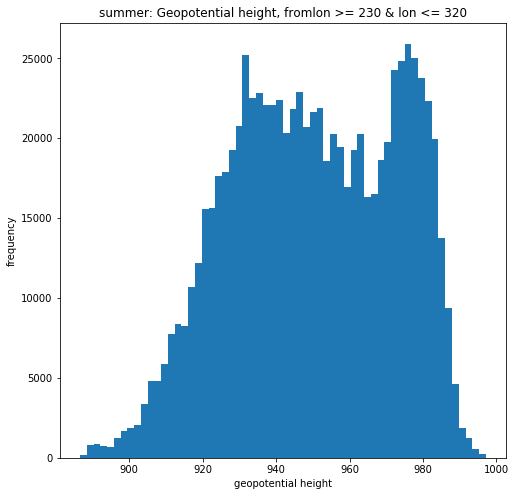

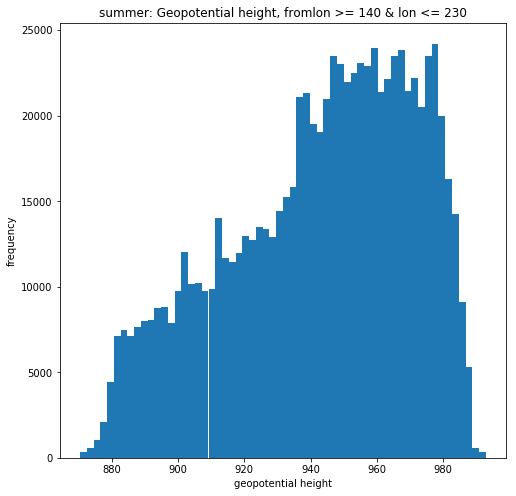

## season: fall

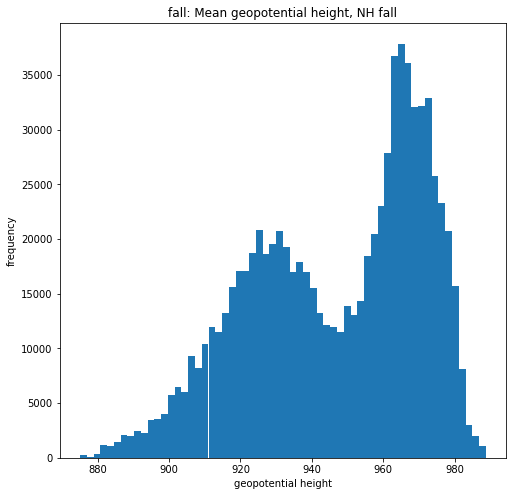

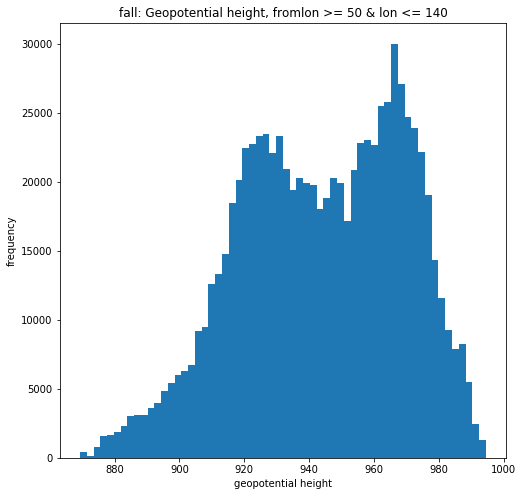

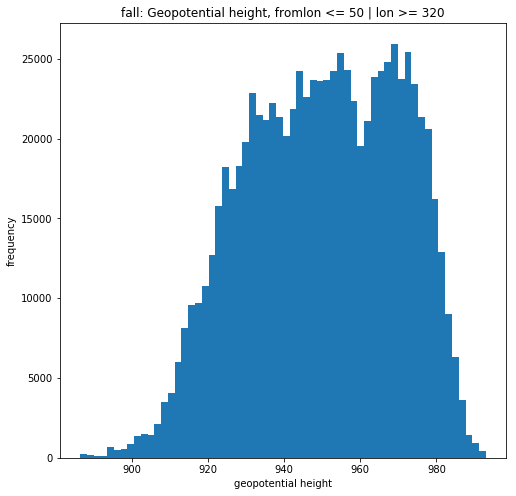

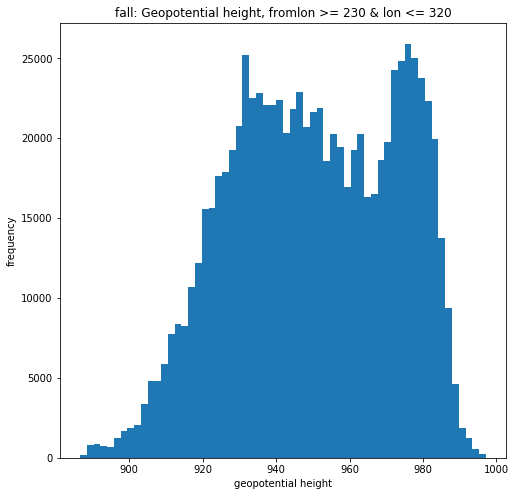

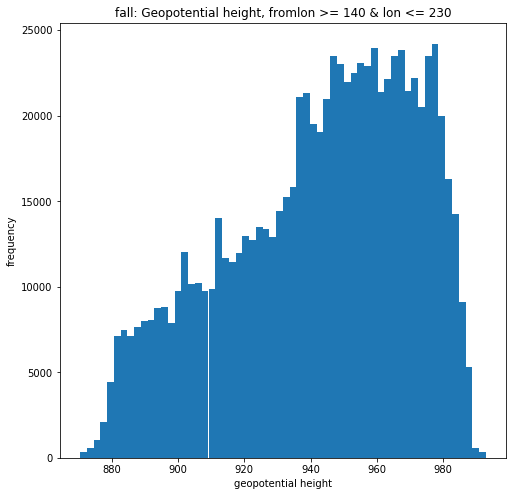

In [11]:
i = 0
for season in season_list:
    
    #display season
    display(Markdown('## season: ' + season_label[i]))
    
    #get the correct dataframe
    season_df = day_df.query(season)
    
    #plot the histogram for the entire season
    plt.clf();
    plt.figure(figsize=(8,8))
    plt.hist(season_df['meanval'], bins = 60)
    #plt.xlim(xmin,xmax)
    plt.ylabel('frequency')
    plt.xlabel('geopotential height')
    plt.title(str(season_label[i]) + ': Mean geopotential height, NH fall');
    plt.show()
    
    
    
    for section in lon_sections:
        
        #get the correct dataframe
        section_df = day_df.query(section)
        
        #plot the figure
        plt.clf();
        plt.figure(figsize=(8,8))
        plt.hist(section_df['meanval'], bins = 60)
        plt.ylabel('frequency')
        plt.xlabel('geopotential height')
        plt.title(str(season_label[i]) + ': Geopotential height, from' + section);
        plt.show()
        
    i = i + 1

## Difference for Geopotential Means histograms
(should be same figures/histograms as generated previously, but in shorter code)

## season: winter

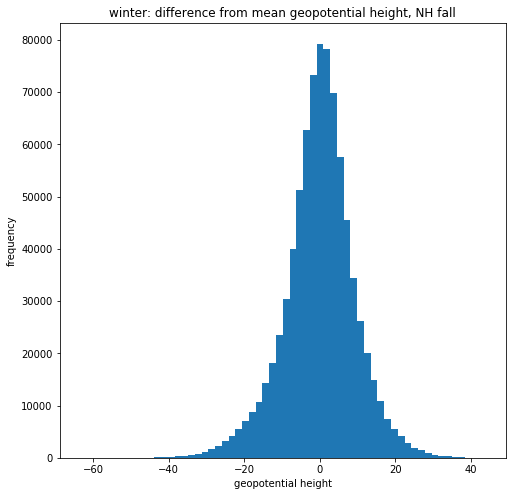

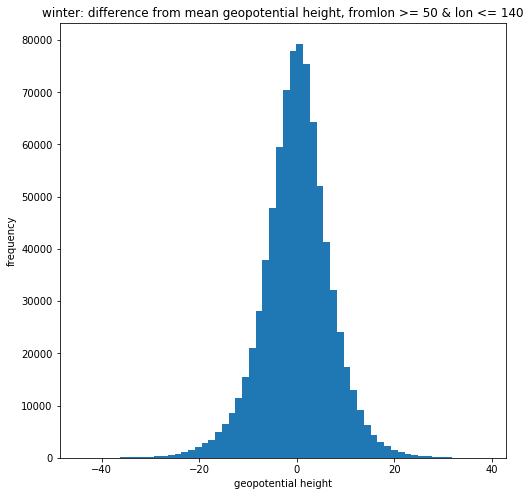

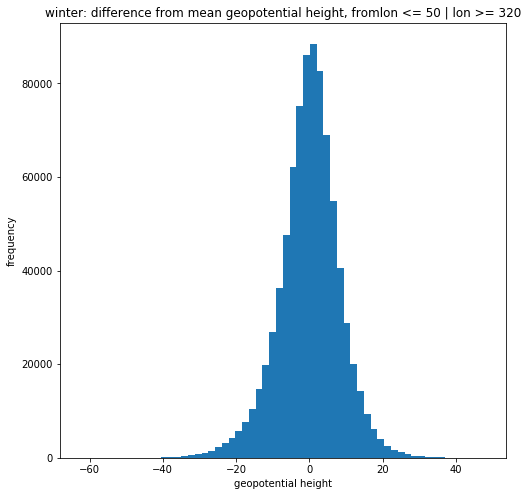

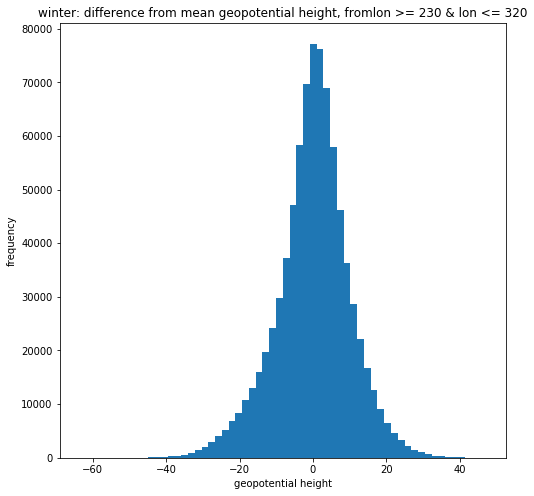

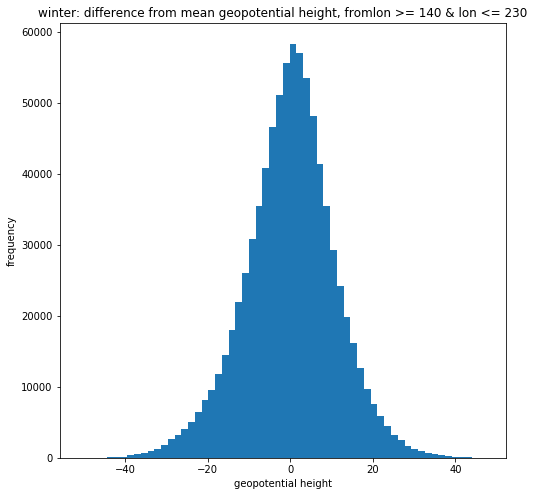

## season: spring

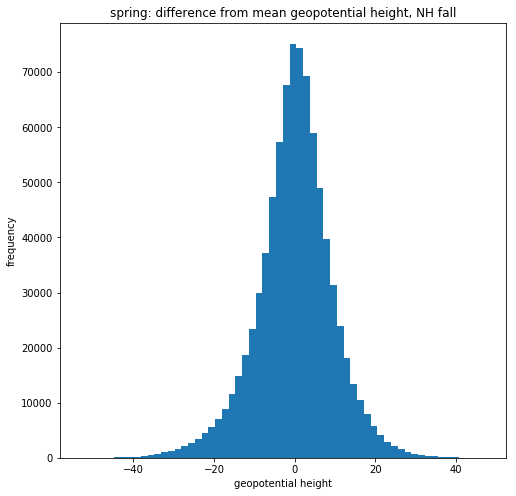

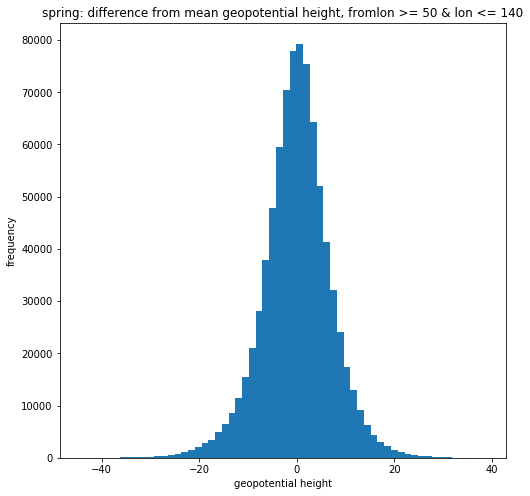

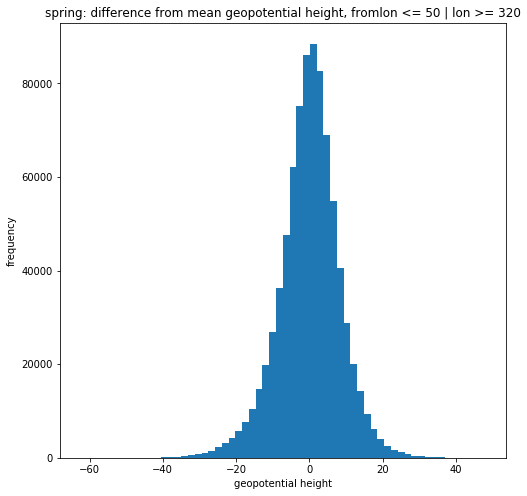

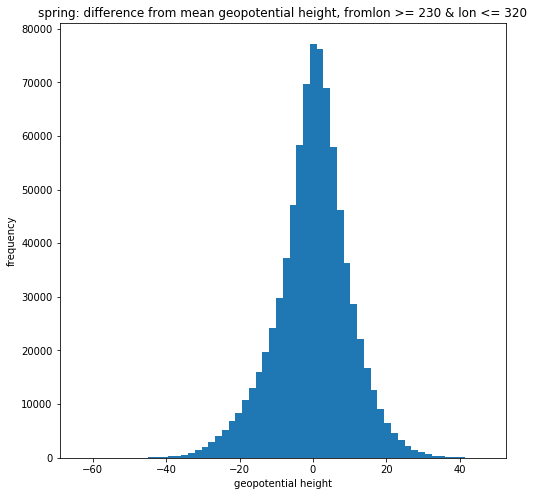

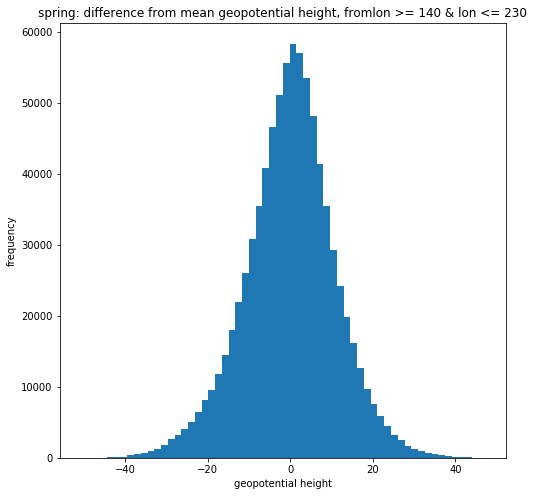

## season: summer

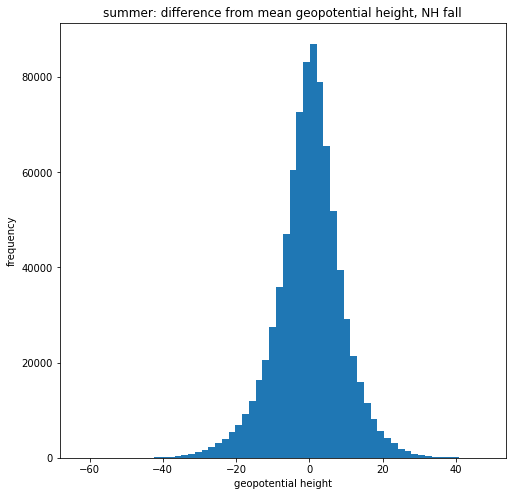

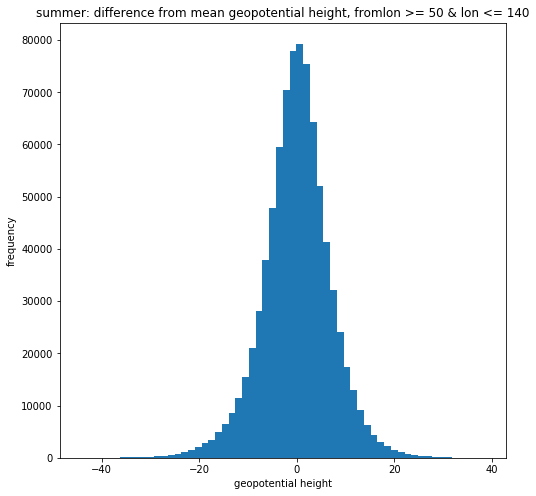

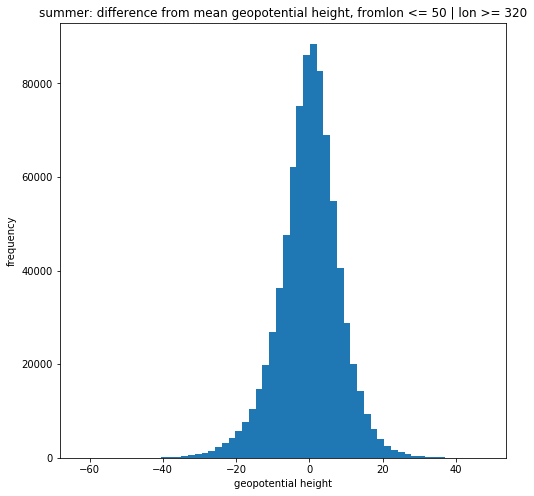

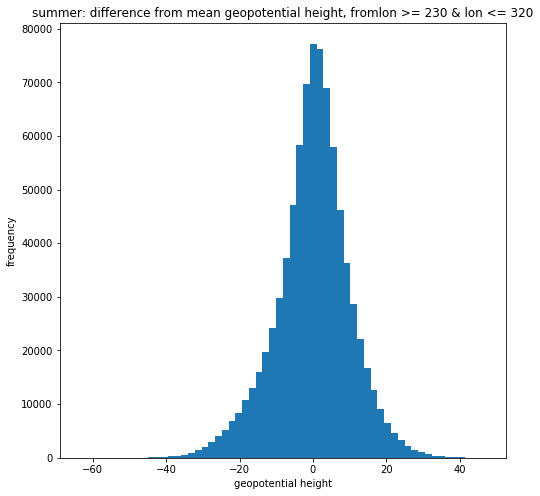

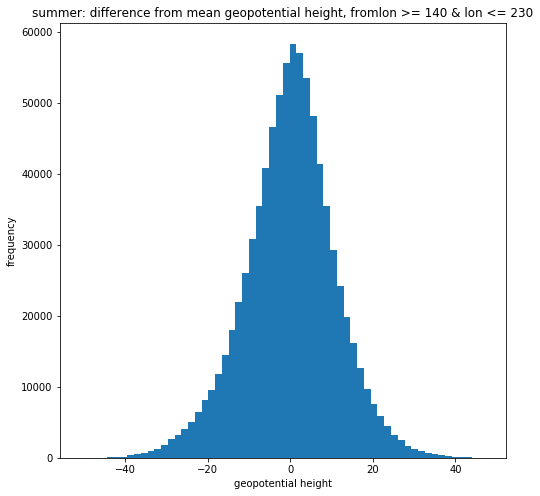

## season: fall

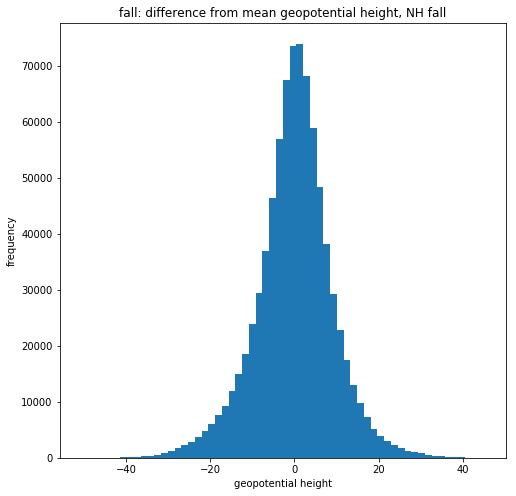

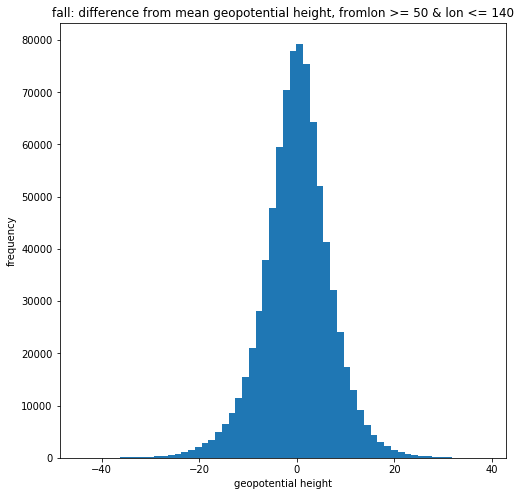

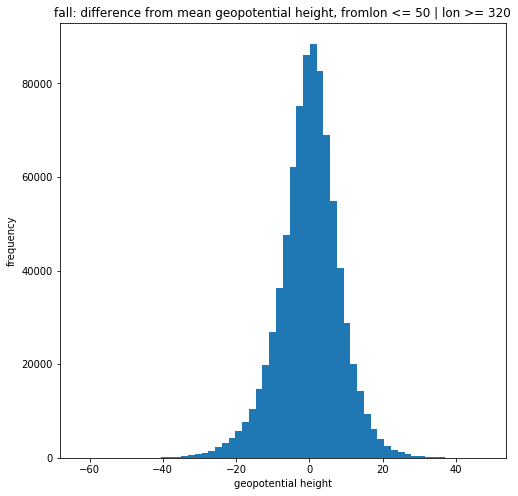

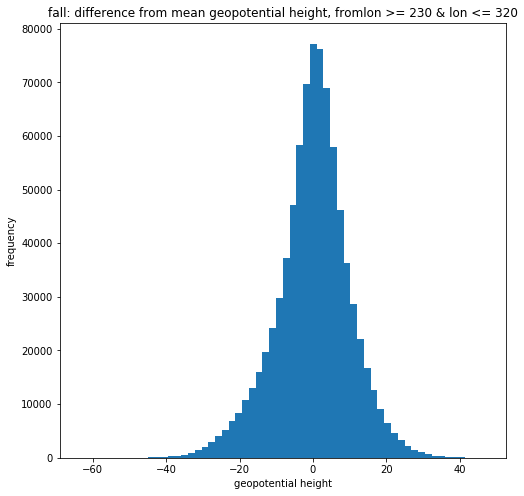

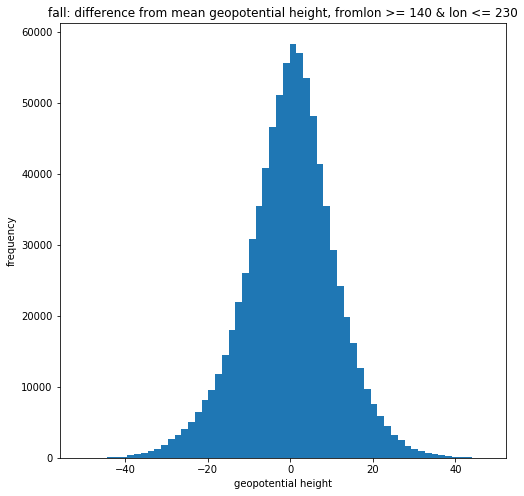

In [12]:
i = 0
for season in season_list:
    
    #display season
    display(Markdown('## season: ' + season_label[i]))
    
    #get the correct dataframe
    season_df = day_df.query(season)
    
    #plot the histogram for the entire season
    plt.clf();
    plt.figure(figsize=(8,8))
    plt.hist(season_df['difference'], bins = 60)
    #plt.xlim(xmin,xmax)
    plt.ylabel('frequency')
    plt.xlabel('geopotential height')
    plt.title(str(season_label[i]) + ': difference from mean geopotential height, NH fall');
    plt.show()
    
    
    
    for section in lon_sections:
        
        #get the correct dataframe
        section_df = day_df.query(section)
        
        #plot the figure
        plt.clf();
        plt.figure(figsize=(8,8))
        plt.hist(section_df['difference'], bins = 60)
        plt.ylabel('frequency')
        plt.xlabel('geopotential height')
        plt.title(str(season_label[i]) + ': difference from mean geopotential height, from' + section);
        plt.show()
        
    i = i + 1

## Departure of Geopotential Mean (Four day average)
These histograms are the departure of the geopotential mean for a four day average, in order to compare with previous histograms (1 day average). For the 1 day average, the distributions are roughly symmetric, do the four-day average values show a longer tail in ridges/positive?

## season: winter

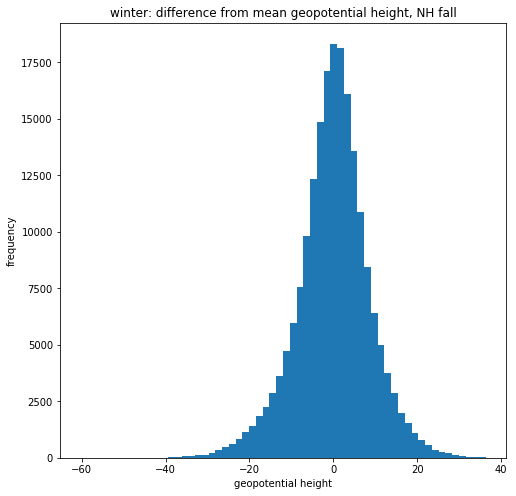

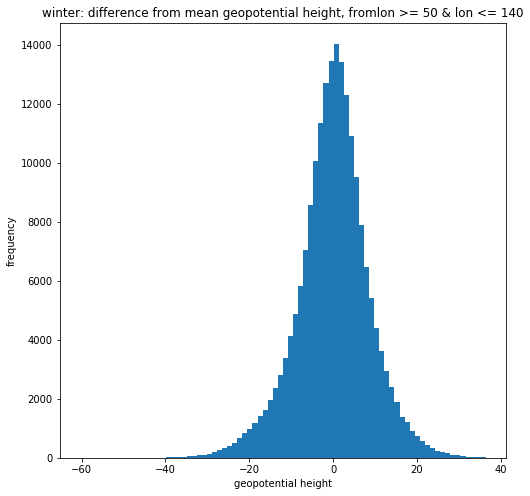

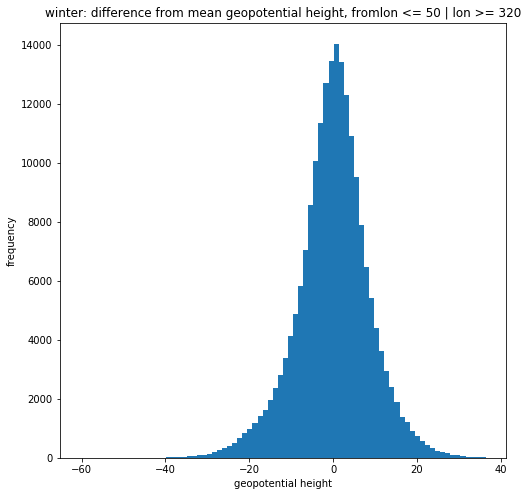

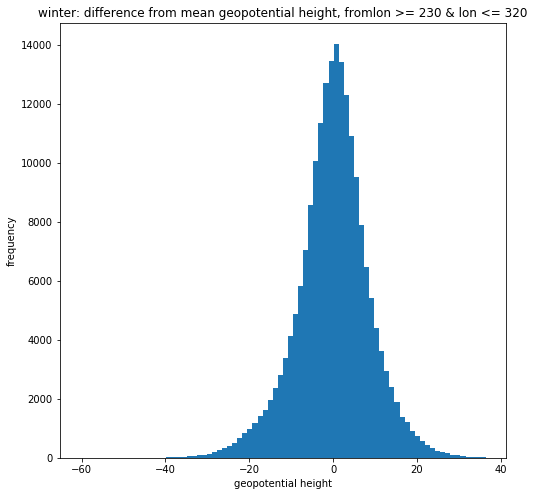

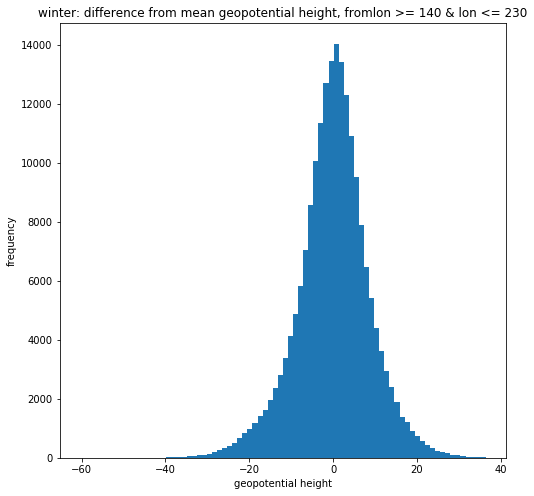

## season: spring

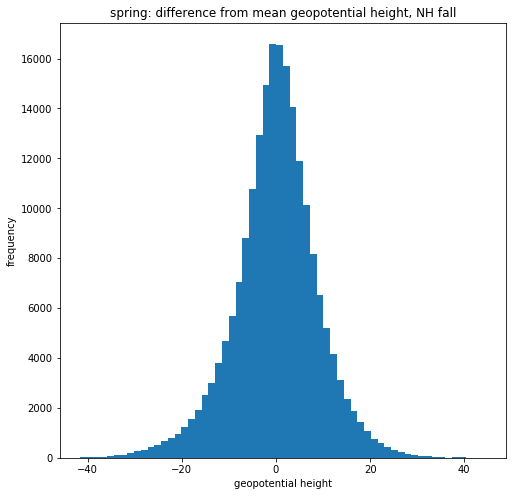

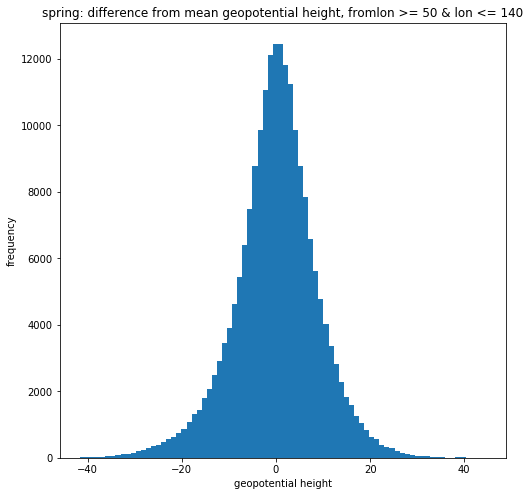

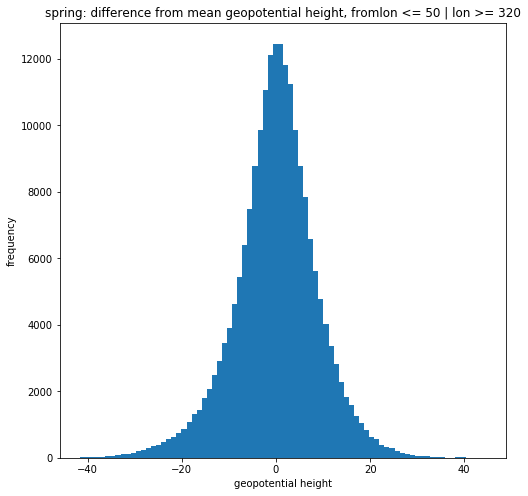

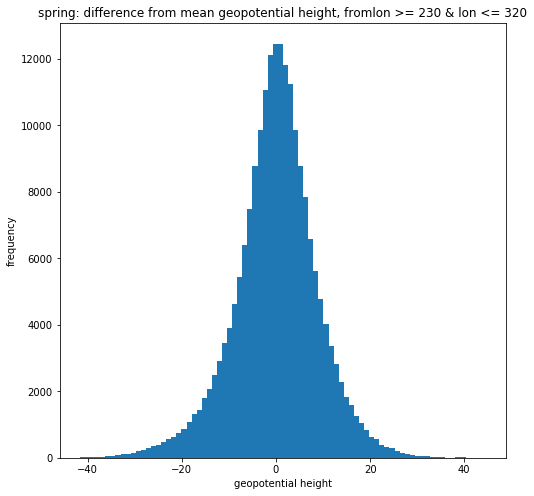

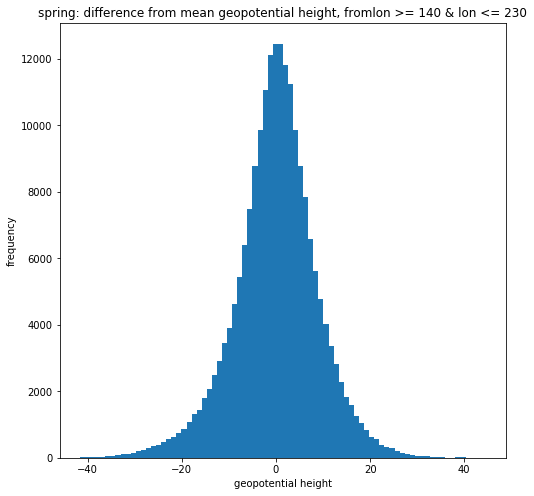

## season: summer

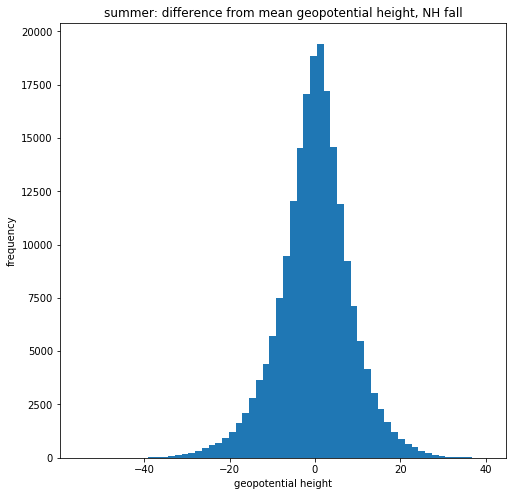

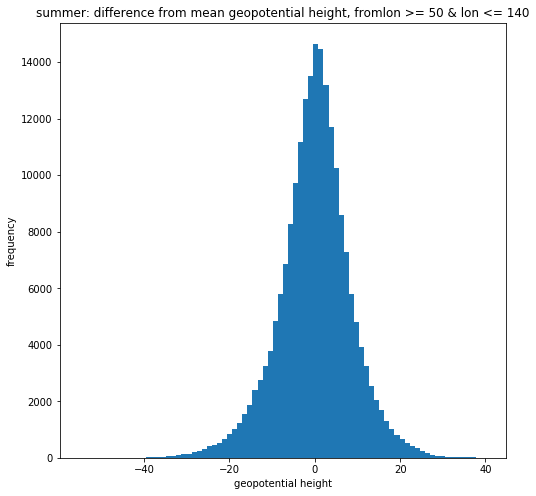

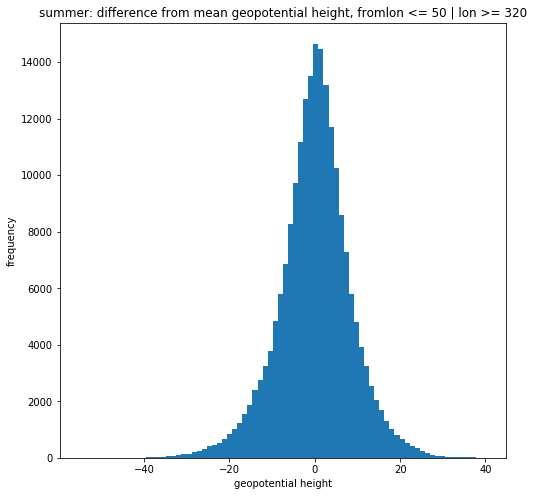

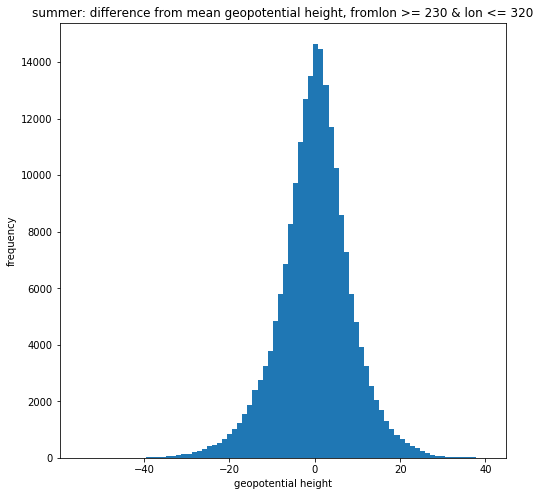

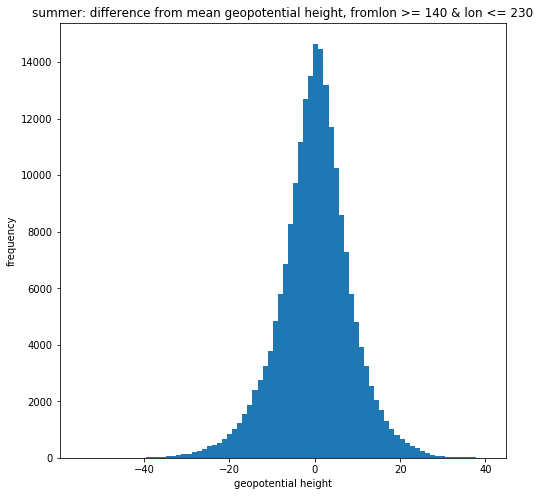

## season: fall

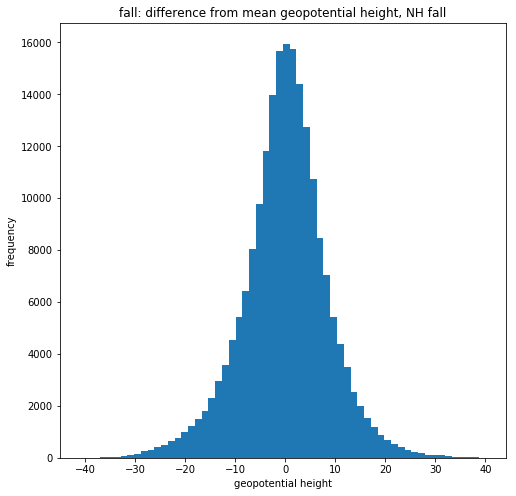

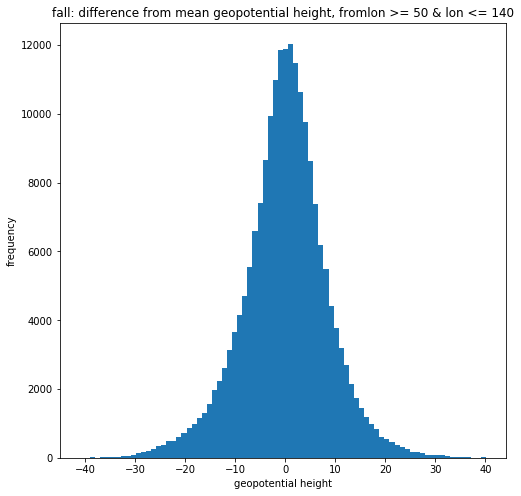

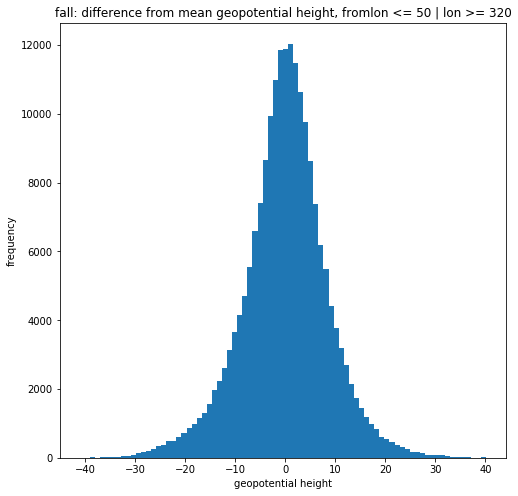

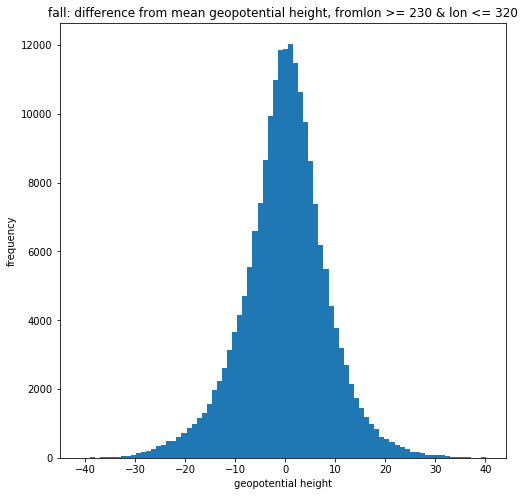

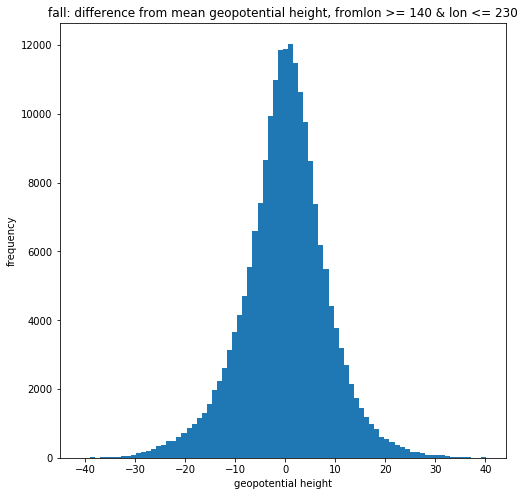

In [40]:
i = 0
for season in season_list:
    
    #display season
    display(Markdown('## season: ' + season_label[i]))
    
    #get the correct dataframe
    season_df = avg4_df.query(season)
    
    #plot the histogram for the entire season
    plt.clf();
    plt.figure(figsize=(8,8))
    plt.hist(season_df['difference'], bins = 60)
    #plt.xlim(xmin,xmax)
    plt.ylabel('frequency')
    plt.xlabel('geopotential height')
    plt.title(str(season_label[i]) + ': difference from mean geopotential height, NH fall');
    plt.show()
    
    
    
    for section in lon_sections:
        
        #get the correct dataframe
        section_df = day_df.query(section)
        
        #plot the figure
        plt.clf();
        plt.figure(figsize=(8,8))
        plt.hist(season_df['difference'], bins = 80)
        plt.ylabel('frequency')
        plt.xlabel('geopotential height')
        plt.title(str(season_label[i]) + ': difference from mean geopotential height, from' + section);
        plt.show()
        
    i = i + 1